# Predicting Grain Yields with a Pedigree-Based Reaction Norm GxE Model using the BGLR Package in R

From A Pedigree-Based Reaction Norm Model for Prediction of Cotton Yield in Multienvironment Trials

https://dl.sciencesocieties.org/publications/cs/abstracts/55/3/1143?access=0&view=pdf

## Install Necessary Packages and Mount Drive

In [ ]:
# To host on a local runtime:
# Run the following from the command line or miniconda shell on your local machine:

# pip install jupyter_http_over_ws
# jupyter serverextension enable --py jupyter_http_over_ws

# conda create -n gxe_gee python=3.7 ipykernel jupyter anaconda
# conda activate gxe_gee
# ipython kernel install --name gxe_gee --user

# jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \ --port=8888 \ --NotebookApp.port_retries=0
# jupyter notebook  --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888  --NotebookApp.port_retries=0


In [ ]:
# Installing rpy2 package through Python to run R code

#!pip install rpy2

# If pip install doesn't work, try:

# !conda install -c r rpy2

# If the conda install line doesn't work, or if you have issues on your locally hosted runtime, try the following:
# https://anaconda.zendesk.com/hc/en-us/articles/360023857134-Setting-up-rpy2-on-Windows


^C


In [1]:
!pip install tzlocal
!pip install simplegeneric

In [2]:
# import necessary libraries in Python
import pandas as pd
import numpy as np
import os

In [3]:
# activate R magic
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [4]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# import R's "base" package
base = importr('base')

# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

<rpy2.rinterface.NULLType object at 0x7f90113e4780> [RTYPES.NILSXP]

In [5]:
# Import the pandas2ri functions and activate
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [6]:
%%capture
%%R # Install other R Packages
# May result in RunTimeWarnings, these can be ignored
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidyverse')
install.packages('caret')
install.packages("VIM")
install.packages('BGLR')

R[write to console]: also installing the dependencies ‘ps’, ‘processx’, ‘callr’, ‘prettyunits’, ‘backports’, ‘desc’, ‘pkgbuild’, ‘rprojroot’, ‘rstudioapi’, ‘evaluate’, ‘pkgload’, ‘praise’, ‘lattice’, ‘colorspace’, ‘assertthat’, ‘utf8’, ‘Rcpp’, ‘testthat’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘lifecycle’, ‘cli’, ‘crayon’, ‘ellipsis’, ‘fansi’, ‘magrittr’, ‘pillar’, ‘pkgconfig’, ‘vctrs’, ‘digest’, ‘glue’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘rlang’, ‘scales’, ‘tibble’, ‘withr’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ps_1.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 98761 bytes (96 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [7]:
%%R 
require("dplyr")
require('BGLR')
require('tidyverse')
require('caret')
require('VIM')

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: BGLR

R[write to console]: Loading required package: tidyverse

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ stringr 1.4.0
✔ tidyr   1.0.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Loading required package: caret

R[write to console]: Loading required package: lattice

R[write to console]: 
Attac

In [ ]:
# Mount the Colab notebook in Google Drive
# Only if running from a hosted runtime in Colab, ignore if running locally

#from google.colab import drive # import drive from google colab

# drive.mount("/content/drive")  # mount the google drive at /content/drive

In [ ]:
# Search for the root directory of the project in Drive and save as a path string

# parent_dir_name = 'GxE with GEE'

# for dirpath, subdirs, files in os.walk('/content'):
#   if parent_dir_name in subdirs:
#     parent_path = dirpath + "/" + parent_dir_name

# parent_path

In [ ]:
# Set Data Path
## Change the destination to your Drive directory containing the folder 'raw_data.zip'
# data_path_end = '/Colab Workspace/Data'
# data_path = parent_path + data_path_end
# os.chdir(data_path)
# os.getcwd()

In [ ]:
# Locally hosted version, just set the destination manually

# data_path = 'C:/Users/theaa/Downloads'
# os.chdir('C:/Users/theaa/Downloads')
# os.getcwd()

In [ ]:
%%R -i data_path
# Import the parent_path object from Python and use to set the R working directory
 setwd(data_path)

In [8]:
%%R
getwd()

[1] "/home/jupyter/gxe-gee-lmm"


## Processing Sample Data

From A Pedigree-Based Reaction Norm Model for Prediction of Cotton Yield in Multienvironment Trials

https://dl.sciencesocieties.org/publications/cs/abstracts/55/3/1143?access=0&view=pdf

### Description of Data Objects

* `Y`: data frame containing the elements described below;

  * `Y$grain_yield` (n×1), a numeric vector with centered and standardized yield;

  * `Y$VAR`  (n×1), a factor giving the IDs for the varieties;

  * `Y$ENV` (n×1), a factor giving the IDs for the environments (year-location);

* `A`: a symmetric positive semi-definite matrix containing the pedigree or marker-based relationships (dimensions equal to number of lines by number of lines). We assume that the `rownames(A)=colnames(A)` gives the IDs of the lines;

* `W`: a matrix containing the environmental covariates (n×q).


## Processing the Entire Dataset

### Import and Process CIMMYT Data

In [ ]:
data = pd.read_pickle('proc_data.pkl')
data.columns=data.columns.str.upper()
data.head()

In [ ]:
# Save Data from Python Environment to CSV
data['GRAIN_YIELD'] = pd.to_numeric(data['GRAIN YIELD'],errors='coerce')
data.drop_duplicates(subset=['UNIQUE_ID'],inplace=True)
data.dropna(subset=['GRAIN_YIELD'],inplace=True)
data.dropna(subset=['HARVEST_FINISHING_DATE'],inplace=True)
data.dropna(subset=['GENO_ID'],inplace=True)

data = data.astype(str)
data.to_csv('yield_data.csv')

In [ ]:
%%R
# Import Data Objects to R Environment
# n is number of observations

data = read.csv('yield_data.csv', header = TRUE)
data = data.frame(lapply(data, as.character), stringsAsFactors=FALSE)
data[ data == "nan" ] <- NA
data[ data == "NaN" ] <- NA
data[ data == "NaT" ] <- NA
row.names(data) = data$UNIQUE_ID

nrow(data)

[1] 149529


In [ ]:
%%R
# Import GID Numbers CSV
GID_CID_SID = read.csv('GID_Numbers.csv')

GID_CID_SID = data.frame(lapply(GID_CID_SID, as.character), stringsAsFactors=FALSE)
GID_CID_SID[ GID_CID_SID == "nan" ] <- NA
GID_CID_SID[ GID_CID_SID == "NaN" ] <- NA
GID_CID_SID[ GID_CID_SID == "NaT" ] <- NA

GID_CID_SID$GENO_ID = paste(GID_CID_SID$CID, "_", GID_CID_SID$SID, sep = "")

In [ ]:
%%R
# Join Sample with GIDs by CID_SID
data_merge = merge(data, GID_CID_SID, by="GENO_ID", )
data_merge = data.frame(lapply(data_merge, as.character), stringsAsFactors=FALSE)
data_merge[ data_merge == "nan" ] <- NA
data_merge[ data_merge == "NaN" ] <- NA
data_merge[ data_merge == "NaT" ] <- NA
row.names(data_merge) = data_merge$UNIQUE_ID

nrow(data_merge)

[1] 145770


In [ ]:
%%R
# Drop rows with missing data for yield, location, harvest timing
data_merge = data_merge[!is.na(data_merge$GRAIN_YIELD),]
data_merge = data_merge[!is.na(data_merge$LAT_COORD),]
data_merge = data_merge[!is.na(data_merge$LONG_COORD),]
data_merge = data_merge[!is.na(data_merge$HARVEST_FINISHING_DATE),]


In [ ]:
%%R
# Identify missing IDs
Un_ID_missing = setdiff(rownames(data), rownames(data_merge))
length(Un_ID_missing)

[1] 4002


### Import A Matrix

In [ ]:
%%R
# A : pedigree coefficient of parentage symmetric positive semi-definite matrix

# Rdata files don't seem to open properly in the Rpy2 environment
# Use the following commands in R to convert the Rdata to a csv

# A_raw = load('A_3k.RData')
# write.csv(A_raw, 'A_matrix.csv')

A = read.csv('A_matrix.csv', row.names = 1, header = TRUE)

In [ ]:
%%R
# Remove the X prefix from the column names
names(A) <- substring(names(A),2)

# Get a list of unique GID values from the data
Unique_GID = c(unique(data_merge$GID))
length(Unique_GID)


[1] 3449


In [ ]:
%%R
# Identify the GIDs which are present in the data but not the A matrix
GID_missing = setdiff(Unique_GID, rownames(A))
length(GID_missing)

[1] 6


In [ ]:
%%R
# Remove the missing GID from the list of unique GIDs from the data sample
if (length(GID_missing) > 0) {
Unique_GID = Unique_GID[Unique_GID != GID_missing]
}  

length(Unique_GID)


[1] 3446


In [ ]:
%%R
# Subset the A matrix to the list of GIDs in the data sample
A = A[Unique_GID,Unique_GID]

# Convert to a matrix
A = as.matrix(A)


R[write to console]: Error in `[.data.frame`(A, Unique_GID, Unique_GID) : 
  undefined columns selected
Calls: <Anonymous> -> <Anonymous> -> withVisible -> [ -> [.data.frame

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In Unique_GID != GID_missing :
R[write to console]: 
 
R[write to console]:  longer object length is not a multiple of shorter object length




Error in `[.data.frame`(A, Unique_GID, Unique_GID) : 
  undefined columns selected
Calls: <Anonymous> -> <Anonymous> -> withVisible -> [ -> [.data.frame


In [ ]:
%%R
# Remove the missing GID values from the data sample
data_merge = data_merge[ ! data_merge$GID %in% GID_missing, ]
print(paste('The number of rows in the data sample is: ', nrow(data_merge)))
print(paste('The number of unique varieties by GID is: ', length(unique(data_merge$GID))))

[1] "The number of rows in the data sample is:  145348"
[1] "The number of unique varieties by GID is:  3443"


### Splitting into Yield and Environment Objects


In [ ]:
%%R
# Yield Vector (nx1)
grain_yield = data_merge$GRAIN_YIELD
grain_yield = as.numeric(grain_yield)
grain_yield = standardize(grain_yield)
length(grain_yield)

[1] 145348


In [ ]:
%%R
# Varieties (nx1)
VAR = data_merge$GID
VAR = as.numeric(VAR)


In [ ]:
%%R
# Environments, meaning location-year combinations (nx1)
data_merge$LOC_YEAR = paste(data_merge$LAT_COORD, "_",
                            data_merge$LONG_COORD, "_", 
                            sapply(strsplit(data_merge$HARVEST_FINISHING_DATE,"-"), `[`, 1)
                            , sep = "")

ENV = data_merge$LOC_YEAR

In [ ]:
%%R
Y = data.frame(grain_yield, VAR, ENV)
print(nrow(Y))
head(Y)

[1] 145348
  grain_yield     VAR               ENV
1       2.065 1395073  25.18_83.03_2003
2       5.764 1395073   36.13_59.4_2003
3       3.697 1395073 -23.22_-51.1_2003
4       2.993 1395073   36.5_68.55_2003
5       0.861 1395073  30.12_67.01_2003
6       3.435 1395073  36.38_66.56_2003


In [ ]:
%%R
# Extract Environmental Covariates
env_cov_list = c('ALTITUDE',
'PPN_10TH_MO_BEFORE_HARVESTED',
'PPN_11TH_MO_BEFORE_HARVESTED',
'PPN_1ST_MO_BEFORE_HARVESTED',
'PPN_2ND_MO_BEFORE_HARVESTED',
'PPN_3RD_MO_BEFORE_HARVESTED',
'PPN_4TH_MO_BEFORE_HARVESTED',
'PPN_5TH_MO_BEFORE_HARVESTED',
'PPN_6TH_MO_BEFORE_HARVESTED',
'PPN_7TH_MO_BEFORE_HARVESTED',
'PPN_8TH_MO_BEFORE_HARVESTED',
'PPN_9TH_MO_BEFORE_HARVESTED',
'PPN_MONTH_OF_HARVESTED',
'PRECIPITATION_FROM_SOWING_TO_MATURITY',
#'SOIL_CLASIFICATION',
'TOTAL_PRECIPIT_IN_12_MONTHS',
'IRRIGATED'
#, 'PRE_SOWING_IRRIGATION'
)

W = data_merge[env_cov_list]
W = type.convert(W)

dmy = dummyVars(" ~ .", data = W)
W = data.frame(predict(dmy, newdata = W))

str(W)

'data.frame':	145348 obs. of  17 variables:
 $ ALTITUDE                             : num  128 985 540 403 1600 ...
 $ PPN_10TH_MO_BEFORE_HARVESTED         : num  NA NA 80 NA NA NA NA 4 92 NA ...
 $ PPN_11TH_MO_BEFORE_HARVESTED         : num  NA NA 82 NA NA NA NA 12 NA NA ...
 $ PPN_1ST_MO_BEFORE_HARVESTED          : num  NA NA 48 9 NA NA 25 93 77 5 ...
 $ PPN_2ND_MO_BEFORE_HARVESTED          : num  91 40 31 53 NA NA 49 67 28 23 ...
 $ PPN_3RD_MO_BEFORE_HARVESTED          : num  10 62 57 109 NA NA 145 73 24 78 ...
 $ PPN_4TH_MO_BEFORE_HARVESTED          : num  4 35 103 43 NA NA 10 NA 22 158 ...
 $ PPN_5TH_MO_BEFORE_HARVESTED          : num  NA 30 31 27 NA NA 17 15 7 103 ...
 $ PPN_6TH_MO_BEFORE_HARVESTED          : num  NA 30 150 NA NA NA NA 7 18 50 ...
 $ PPN_7TH_MO_BEFORE_HARVESTED          : num  NA 19 286 NA NA NA NA 3 115 75 ...
 $ PPN_8TH_MO_BEFORE_HARVESTED          : num  NA 22 67 NA NA NA NA 5 259 29 ...
 $ PPN_9TH_MO_BEFORE_HARVESTED          : num  NA 1 236 NA NA NA NA 7 38 


 Variables sorted by number of missings: 
                              Variable      Count
          PPN_11TH_MO_BEFORE_HARVESTED 0.79423865
          PPN_10TH_MO_BEFORE_HARVESTED 0.78170322
           PPN_9TH_MO_BEFORE_HARVESTED 0.76278999
                PPN_MONTH_OF_HARVESTED 0.75510499
           PPN_8TH_MO_BEFORE_HARVESTED 0.74525277
           PPN_7TH_MO_BEFORE_HARVESTED 0.72655970
           PPN_6TH_MO_BEFORE_HARVESTED 0.71291659
           PPN_1ST_MO_BEFORE_HARVESTED 0.70174340
           PPN_5TH_MO_BEFORE_HARVESTED 0.69912899
           PPN_4TH_MO_BEFORE_HARVESTED 0.68911853
           PPN_2ND_MO_BEFORE_HARVESTED 0.68845117
           PPN_3RD_MO_BEFORE_HARVESTED 0.68044968
           TOTAL_PRECIPIT_IN_12_MONTHS 0.58679858
 PRECIPITATION_FROM_SOWING_TO_MATURITY 0.58268432
                          IRRIGATED.NO 0.01954619
                         IRRIGATED.YES 0.01954619
                              ALTITUDE 0.00000000


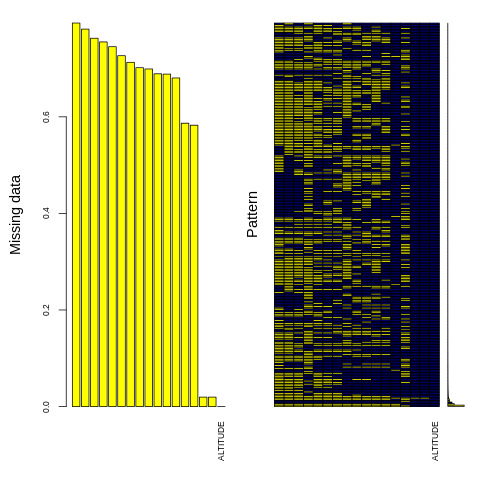

In [ ]:
%%R
# Visualize missing data using mice_plot function
mice_plot <- aggr(W, col=c('navyblue','yellow'),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(W), cex.axis=.7,
                    gap=3, ylab=c("Missing data","Pattern"))

### Multiple Imputation by Chained Equations for Environment Data

In [ ]:
%%R
# Hmisc method, doesn't work unless you spell out all the variables in the function.
# Potentially find a workaround

#install.packages("Hmisc")
#library(Hmisc)

#ivs = paste(env_cov_list,sep = "" )
#iv_string <- paste(ivs, collapse=" + ")
#iv_string[0]

#impute_arg <- aregImpute(as.formula(~iv_string), data = W, n.impute = 5)

In [ ]:
%%R
# missForest function for imputation
# Seems to be the fastest and works non-parametrically

install.packages("missForest")
library(missForest)


In [ ]:
%%R
W.imp <- missForest(W)

W.imp$OOBerror


In [ ]:
%%R
W_imp <- W.imp$ximp
W <- W_imp

In [ ]:
%%R
# Save after imputing missing values for W since the function takes a while
# Import the data again if you come back in another session

# write.csv(W, 'W_imp.csv')
#W <- read.csv('W_imp.csv')

In [ ]:
%%R
# mice package for imputation, highly recommended but seems too slow for size of data
# https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/

#W.imp <- mice(W, m=5, maxit = 15, method = 'pmm')
#summary(W.imp)


 iter imp variable
  1   1  PPN_10TH_MO_BEFORE_HARVESTED  PPN_11TH_MO_BEFORE_HARVESTED  PPN_1ST_MO_BEFORE_HARVESTED  PPN_2ND_MO_BEFORE_HARVESTED  PPN_3RD_MO_BEFORE_HARVESTED  PPN_4TH_MO_BEFORE_HARVESTED  PPN_5TH_MO_BEFORE_HARVESTED  PPN_6TH_MO_BEFORE_HARVESTED  PPN_7TH_MO_BEFORE_HARVESTED  PPN_8TH_MO_BEFORE_HARVESTED

From cffi callback <function _processevents at 0x7ffabdc139d8>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


  PPN_9TH_MO_BEFORE_HARVESTED  PPN_MONTH_OF_HARVESTED  PRECIPITATION_FROM_SOWING_TO_MATURITY

From cffi callback <function _processevents at 0x7ffabdc139d8>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


  TOTAL_PRECIPIT_IN_12_MONTHS  IRRIGATED.NO
  1   2  PPN_10TH_MO_BEFORE_HARVESTED  PPN_11TH_MO_BEFORE_HARVESTED  PPN_1ST_MO_BEFORE_HARVESTED

In [ ]:
%%R
#W <- complete(W.imp,2)

In [ ]:
%%R
# Standardize environmental data
W <- standardize(W)
W.head()

In [ ]:
%%R
# Check that yield, variety, location, and environmental covariates are same length
print(paste('Yield vector length: ', length(Y$grain_yield)))
print(paste('Varieties vector length: ', length(Y$VAR)))
print(paste('Location-year vector length: ', length(Y$ENV)))
print(paste('Environmental covariates vector length: ', nrow(W)))

# Check that A Matrix contrains all unique varieties from the data
print(paste('Unique Varieties: ', length(unique(Y$VAR))))
print(paste('A Matrix length: ', nrow(A)))

[1] "Yield vector length:  145348"
[1] "Varieties vector length:  145348"
[1] "Location-year vector length:  145348"
[1] "Environmental covariates vector length:  145348"
[1] "Unique Varieties:  3443"
[1] "A Matrix length:  3489"


### Export Merged Data for Comparison

In [ ]:
%%R
# Export the merged data for comparison
write.csv(data_merge, 'merged_data.csv')
write.csv(Y, 'pheno_yield_data.csv')
write.csv(W, 'environmental_covariates_data.csv')
write.csv(A, 'pedigree_data.csv')

## Import Data and Prep for Analysis

In [9]:
%%R
# Read data back in, only if you have already saved it in a previous session and have to come back
Y <- read.csv('pheno_yield_data.csv', row.names = 1)
W <- read.csv('environmental_covariates_data.csv', row.names = "X")
A <- read.csv('pedigree_data.csv', row.names = 1)

In [10]:
%%R
# A matrix doesn't read in well as a CSV, need to repeat some processing steps
# Remove the X prefix from the column names
names(A) <- substring(names(A),2)
print(colnames(A)[1])
print(rownames(A)[1])

[1] "30374"
[1] "30374"


In [11]:
%%R
# Get a list of unique GID values from the data
Unique_GID = c(unique(Y$VAR))
length(Unique_GID)


[1] 3443


In [12]:
%%R
# Identify the GIDs which are present in the data but not the A matrix
#GID_missing = setdiff(Unique_GID, rownames(A))
GID_missing = setdiff(rownames(A), Unique_GID)
length(GID_missing)

[1] 46


In [13]:
%%R
# Remove the missing GID from the list of unique GIDs from the data sample
Unique_GID = Unique_GID[Unique_GID != GID_missing]
Unique_GID <- unlist(lapply(Unique_GID, as.character))
# Subset the A matrix to the list of GIDs in the data sample
A = A[Unique_GID,Unique_GID]
# Convert to a matrix
A = as.matrix(A)
nrow(A)

[1] 3443


In [14]:
%%R
print(paste('Environmental covariates vector length: ', nrow(W)))
print(paste('Unique Varieties: ', length(unique(Y$VAR))))
print(paste('A Matrix length: ', nrow(A)))

[1] "Environmental covariates vector length:  145348"
[1] "Unique Varieties:  3443"
[1] "A Matrix length:  3443"


## Run Model on Full Data

In [15]:
%%R
# Fitting Model 1 (Main Environment-Line Effects)
# (EL)

set.seed(123)
training.samples <- Y$grain_yield %>%
  createDataPartition(p = 0.8, list = FALSE)

y_train = Y$grain_yield
y_train[-training.samples] = NA

# incidence matrix for main eff. of environments.
ZE = model.matrix(~factor(Y$ENV)-1)     

# incidence matrix for main eff. of lines.
Y$VAR = factor(x=Y$VAR,levels=rownames(A),ordered=TRUE)
ZVAR = model.matrix(~Y$VAR-1)

In [17]:
%%capture
%%R
# Model Fitting

ETA = list(ENV=list(X=ZE,model='BRR'),
           VAR=list(X=ZVAR,model='BRR'))

fm1 = BGLR(y=y_train,ETA=ETA,saveAt='M1_',nIter=500,burnIn=200)


In [21]:
%%R
predictions_1 = fm1$yHat[-training.samples]
test_values = Y$grain_yield[-training.samples]
R2_1 = R2(predictions_1, test_values)
RMSE_1 = RMSE(predictions_1, test_values)
MAE_1 = MAE(predictions_1, test_values)
model1_scores = data.frame(R2_1, RMSE_1, MAE_1)
print(model1_scores)

       R2_1    RMSE_1     MAE_1
1 0.8601279 0.8236158 0.5830012


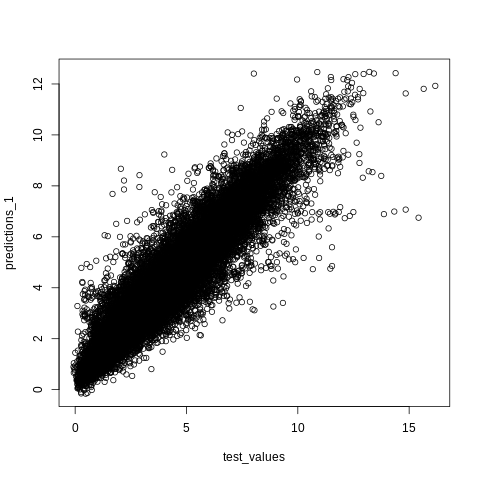

In [18]:
plot(test_values,predictions_1)

In [22]:
!pip install psutil

In [23]:
import psutil

In [25]:
values = psutil.virtual_memory()
total = values.total >> 30
total

409

In [26]:
%%R
remove(ETA, fm1)
remove(predictions_1, R2_1, RMSE_1, MAE_1)

In [19]:
%%R
# Alternative Model 2 with Eigendecomposition

L_star = eigen(A, symmetric =TRUE)
Gamma = L_star$vectors
Lambda = L_star$values 
Z_star = ZVAR%*%Gamma%*%(Lambda^0.5)

In [ ]:
%%capture
%%R
# Fitting Model 2 with Alternative Z_star (Main Environment-Pedigree Effects)
# (EA)

ETA = list(ENV=list(X=ZE,model='BRR'),
           PED=list(X=Z_star,model='BRR'))

fm2 = BGLR(y=y_train,ETA=ETA,saveAt='M2_',nIter=1000,burnIn=500)

In [ ]:
%%R
predictions_2 = fm2$yHat[-training.samples]

R2_2 = R2(predictions_2, test_values)
RMSE_2 = RMSE(predictions_2, test_values)
MAE_2 = MAE(predictions_2, test_values)
model2_scores = data.frame(R2_2, RMSE_2, MAE_2)

In [ ]:
%%R
print(model2_scores)
plot(test_values,predictions_2)

In [ ]:
%%R
remove(ETA, fm2)
remove(predictions_2, R2_2, RMSE_2,MAE_2)

In [ ]:
%%R
# Fitting Model 2 (Main Environment-Pedigree Effects)
# (EA)

# A = A/mean(diag(A))
# L = t(chol(A))
# ZL = ZVAR%*%L

# ETA = list(ENV=list(X=ZE,model='BRR'),
#            PED=list(X=ZL,model='BRR'))
	
# fm2 = BGLR(y=y_train,ETA=ETA,saveAt='M2_',nIter=500,burnIn=200)


In [ ]:
%%R
# predictions = fm2$yHat[-training.samples]
# test_values = Y$grain_yield[-training.samples]
# print(data.frame( R2 = R2(predictions, test_values),
#             RMSE = RMSE(predictions, test_values),
#             MAE = MAE(predictions, test_values)))

# plot(test_values,predictions)

In [27]:
%%R
# Fitting Model 3 (Main Environment-Pedigree-Environmental Covariate Effects)
# (EAW)

W = W/sqrt(ncol(W))


In [ ]:
%%capture
%%R
ETA = list(ENV=list(X=ZE,model='BRR'),
           PED=list(X=Z_star,model='BRR'),
           EC=list(X=W,model='BRR'))

fm3 = BGLR(y=y_train,ETA=ETA,saveAt='M3_',nIter=500,burnIn=200)

In [ ]:
%%R
predictions_3 = fm3$yHat[-training.samples]
test_values = Y$grain_yield[-training.samples]
model3_scores = data.frame(R2_3 = R2(predictions_3, test_values),
            RMSE_3 = RMSE(predictions_3, test_values),
            MAE_3 = MAE(predictions_3, test_values))

print(model3_scores)
plot(test_values,predictions_3)

In [ ]:
%%R
remove(ETA, fm3)

In [28]:
values = psutil.virtual_memory()
total = values.total >> 30
total

409

In [33]:
np.intp

numpy.int64

In [29]:
%%R
# Fitting Model 4 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction)
# (EAW-AxW)

# Results in vector of size 157.4 Gb, need sufficient RAM to hold

ZAZ = tcrossprod(Z_star)

In [29]:
W = as.matrix(W)

WW = tcrossprod(W)

MemoryError: Unable to allocate 157. GiB for an array with shape (145348, 145348) and data type float64

In [34]:
%%R
memory.limit()

[1] Inf


In [30]:
values = psutil.virtual_memory()
total = values.total >> 30
total

409

In [ ]:
%%R
remove(W, Z_star)

In [ ]:
K = ZAZ*WW
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L2 = t(chol(K))

In [ ]:
%%capture
%%R

ETA = list(ENV=list(X=ZE,model='BRR'),
           PED=list(X=ZL,model='BRR'),
           EC=list(X=W,model='BRR'),
           AxW=list(X=L2,model='BRR'))

fm4 = BGLR(y=y_train,ETA=ETA, saveAt='M4_',nIter=500,burnIn=200)

In [ ]:
predictions_4 = fm4$yHat[-training.samples]
print(data.frame( R2_4 = R2(predictions_4, test_values),
            RMSE_4 = RMSE(predictions_4, test_values),
            MAE_4 = MAE(predictions_4, test_values)))

plot(test_values,predictions_4)

In [ ]:
%%R
# Fitting Model 5 (Main Environment-Pedigree-Environmental Covariate Effects 
# with Pedigree-Environmental Covariate Interaction and Pedigree-Environment Main Effects)
# (EAW-AxW-AxE)

ZZ = tcrossprod(ZE)
K = ZZ* ZAZ
diag(K) = diag(K)+1/200 
K = K/mean(diag(K))
L3 = t(chol(K))

In [ ]:
%%capture
%%R

ETA = list(ENV=list(X=ZE,model='BRR'),
           PED=list(X=ZL,model='BRR'),
           EC=list(X=W,model='BRR'),
           AxW=list(X=L2,model='BRR'),
           AxE=list(X=L3,model='BRR'))

fm5 = BGLR(y=y_train,ETA=ETA, saveAt='M5_',nIter=500,burnIn=200)

In [ ]:
%%R
predictions_5 = fm5$yHat[-training.samples]

model5_results =data.frame( R2_5 = R2(predictions_5, test_values),
            RMSE_5 = RMSE(predictions_5, test_values),
            MAE_5 = MAE(predictions_5, test_values))

print(model5_results)

plot(test_values,predictions_5)